1. import all the lib file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

2. check the data and read the first five lines

In [2]:
# check the data
filepath="C:\\Users\\towermalta\\MLcode\\tcd ml 2019-20 income prediction training (with labels).csv"
data = pd.read_csv(filepath)
data.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


3. get the feature of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


4. check the situation of N/A value

In [4]:
data.isnull().sum()

Instance                0
Year of Record        441
Gender               7432
Age                   494
Country                 0
Size of City            0
Profession            322
University Degree    7370
Wears Glasses           0
Hair Color           7242
Body Height [cm]        0
Income in EUR           0
dtype: int64

5. check the information of the dataset: count,mean,std,min,max.......

In [5]:
data.describe()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111993.000000,111552.000000,111499.000000,1.119930e+05,111993.000000,111993.000000,1.119930e+05
mean,55997.000000,1999.421274,37.345304,8.388538e+05,0.500531,175.220192,1.092138e+05
std,32329.738686,11.576382,16.036694,2.196879e+06,0.500002,19.913889,1.498024e+05
min,1.000000,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03
25%,27999.000000,1989.000000,24.000000,7.273400e+04,0.000000,160.000000,3.077169e+04
50%,55997.000000,1999.000000,35.000000,5.060920e+05,1.000000,174.000000,5.733917e+04
75%,83995.000000,2009.000000,48.000000,1.184501e+06,1.000000,190.000000,1.260936e+05
max,111993.000000,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06


6. show the trend of each feature

<function matplotlib.pyplot.show(*args, **kw)>

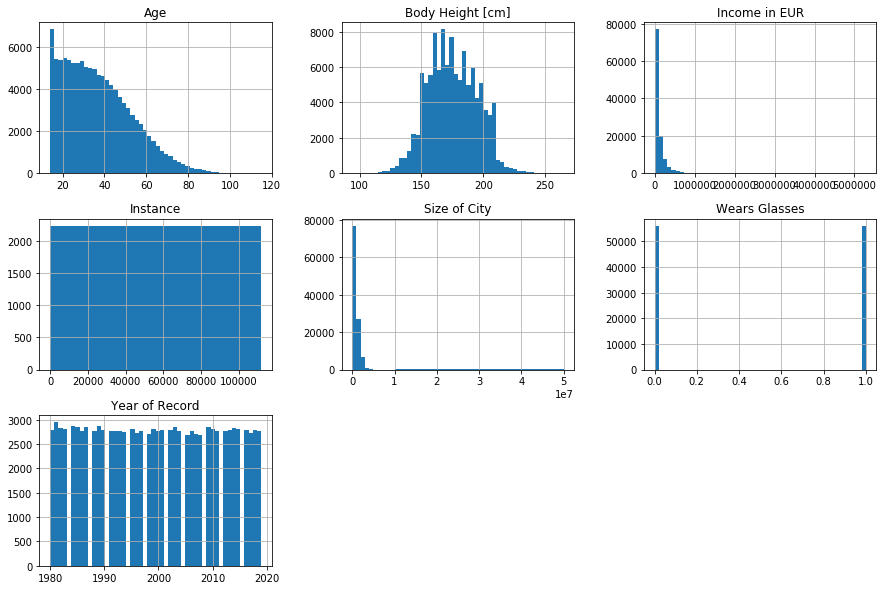

In [6]:
data.hist(bins=50,figsize=(15,10))
plt.show

7. show the trend of income specially

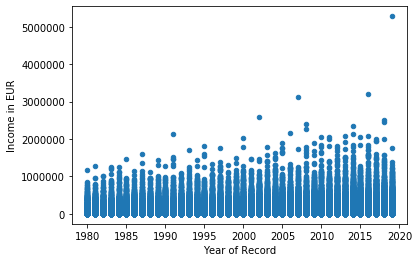

In [7]:
data.plot('Year of Record','Income in EUR',kind = 'scatter')

8. Pearson correlation coefficient is used according to the correlation between features and income.
   at this step, I choose to drop the feature of "wear glasses"

In [10]:
#按各个特征和income的相关性，使用皮尔逊相关系数Pearson
corr_matrix = data.corr()
print(corr_matrix['Income in EUR'].sort_values(ascending=False))

Income in EUR       1.000000
Age                 0.186160
Year of Record      0.165116
Body Height [cm]    0.072889
Size of City        0.014993
Wears Glasses       0.005718
Instance            0.002897
Name: Income in EUR, dtype: float64
